In [ ]:
#밑에 그래프의 한글이 깨질 경우, 이 셀 실행 후 런타임 다시 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from lightgbm import LGBMRegressor

from sklearn.inspection import permutation_importance

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prepare Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/real_estate/final_dataset.csv")

In [5]:
df

,구,법정동,층,건축년도,용적률,건폐율,노령화지수,전세가율,소비자물가지수,회사채,지하철역 개수,면적당가격(만원)
0,서초구,방배동,6,2003.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,909.043296
1,서초구,방배동,21,2004.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,2014.324082
2,서초구,방배동,8,2005.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,929.054054
3,서초구,방배동,11,2001.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,1447.488340
4,서초구,방배동,1,1999.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,1141.173541
...,...,...,...,...,...,...,...,...,...,...,...,...
9629,성동구,도선동,9,2006.0,381.374000,58.717333,3.266667,53.26,106.85,274849.0,4,1401.738155
9630,성동구,도선동,26,2006.0,381.374000,58.717333,3.099502,53.09,104.69,358045.0,4,1277.823578
9631,성북구,성북동1가,13,2015.0,126.286000,49.842000,3.177570,61.53,106.06,248908.0,1,1352.181930
9632,중구,장충동2가,2,1981.0,158.240000,41.712500,3.370370,61.42,106.06,248908.0,1,432.206344


In [6]:
#동만 수치화
qual_col = ["법정동"]

for i in qual_col:
  le = LabelEncoder()
  le = le.fit(df[i])
  df[i] = le.transform(df[i])

In [7]:
Jongno_df = df[df["구"] == "종로구"] #구 선택
Jongno_x = Jongno_df.drop(columns = ["구" , "면적당가격(만원)"]) #구 단위로 선택했기 때문에 구 drop
Jongno_y = Jongno_df["면적당가격(만원)"]

Jung_df = df[df["구"] == "중구"]
Jung_x = Jung_df.drop(columns = ["구" , "면적당가격(만원)"])
Jung_y = Jung_df["면적당가격(만원)"]

Yongsan_df = df[df["구"] == "용산구"]
Yongsan_x = Yongsan_df.drop(columns = ["구" , "면적당가격(만원)"])
Yongsan_y = Yongsan_df["면적당가격(만원)"]

Seongdong_df = df[df["구"] == "성동구"]
Seongdong_x = Seongdong_df.drop(columns = ["구" , "면적당가격(만원)"])
Seongdong_y = Seongdong_df["면적당가격(만원)"]

Gwangjin_df = df[df["구"] == "광진구"]
Gwangjin_x = Gwangjin_df.drop(columns = ["구" , "면적당가격(만원)"])
Gwangjin_y = Gwangjin_df["면적당가격(만원)"]

Dongdaemun_df = df[df["구"] == "동대문구"]
Dongdaemun_x = Dongdaemun_df.drop(columns = ["구" , "면적당가격(만원)"])
Dongdaemun_y = Dongdaemun_df["면적당가격(만원)"]

Jungnang_df = df[df["구"] == "중랑구"]
Jungnang_x = Jungnang_df.drop(columns = ["구" , "면적당가격(만원)"])
Jungnang_y = Jungnang_df["면적당가격(만원)"]

Seongbuk_df = df[df["구"] == "성북구"]
Seongbuk_x = Seongbuk_df.drop(columns = ["구" , "면적당가격(만원)"])
Seongbuk_y = Seongbuk_df["면적당가격(만원)"]

Gangbuk_df = df[df["구"] == "강북구"]
Gangbuk_x = Gangbuk_df.drop(columns = ["구" , "면적당가격(만원)"])
Gangbuk_y = Gangbuk_df["면적당가격(만원)"]

Dobong_df = df[df["구"] == "도봉구"]
Dobong_x = Dobong_df.drop(columns = ["구" , "면적당가격(만원)"])
Dobong_y = Dobong_df["면적당가격(만원)"]

Nowon_df = df[df["구"] == "노원구"]
Nowon_x = Nowon_df.drop(columns = ["구" , "면적당가격(만원)"])
Nowon_y = Nowon_df["면적당가격(만원)"]

Eunpyeong_df = df[df["구"] == "은평구"]
Eunpyeong_x = Eunpyeong_df.drop(columns = ["구" , "면적당가격(만원)"])
Eunpyeong_y = Eunpyeong_df["면적당가격(만원)"]

Seodaemun_df = df[df["구"] == "서대문구"]
Seodaemun_x = Seodaemun_df.drop(columns = ["구" , "면적당가격(만원)"])
Seodaemun_y = Seodaemun_df["면적당가격(만원)"]

Mapo_df = df[df["구"] == "마포구"]
Mapo_x = Mapo_df.drop(columns = ["구" , "면적당가격(만원)"])
Mapo_y = Mapo_df["면적당가격(만원)"]

Yangcheon_df = df[df["구"] == "양천구"]
Yangcheon_x = Yangcheon_df.drop(columns = ["구" , "면적당가격(만원)"])
Yangcheon_y = Yangcheon_df["면적당가격(만원)"]

Gangseo_df = df[df["구"] == "강서구"]
Gangseo_x = Gangseo_df.drop(columns = ["구" , "면적당가격(만원)"])
Gangseo_y = Gangseo_df["면적당가격(만원)"]

Guro_df = df[df["구"] == "구로구"]
Guro_x = Guro_df.drop(columns = ["구" , "면적당가격(만원)"])
Guro_y = Guro_df["면적당가격(만원)"]

Geumcheon_df = df[df["구"] == "금천구"]
Geumcheon_x = Geumcheon_df.drop(columns = ["구" , "면적당가격(만원)"])
Geumcheon_y = Geumcheon_df["면적당가격(만원)"]

Yeongdeungpo_df = df[df["구"] == "영등포구"]
Yeongdeungpo_x = Yeongdeungpo_df.drop(columns = ["구" , "면적당가격(만원)"])
Yeongdeungpo_y = Yeongdeungpo_df["면적당가격(만원)"]

Dongjak_df = df[df["구"] == "동작구"]
Dongjak_x = Dongjak_df.drop(columns = ["구" , "면적당가격(만원)"])
Dongjak_y = Dongjak_df["면적당가격(만원)"]

Gwanak_df = df[df["구"] == "관악구"]
Gwanak_x = Gwanak_df.drop(columns = ["구" , "면적당가격(만원)"])
Gwanak_y = Gwanak_df["면적당가격(만원)"]

Seocho_df = df[df["구"] == "서초구"]
Seocho_x = Seocho_df.drop(columns = ["구" , "면적당가격(만원)"])
Seocho_y = Seocho_df["면적당가격(만원)"]

Gangnam_df = df[df["구"] == "강남구"]
Gangnam_x = Gangnam_df.drop(columns = ["구" , "면적당가격(만원)"])
Gangnam_y = Gangnam_df["면적당가격(만원)"]

Songpa_df = df[df["구"] == "송파구"]
Songpa_x = Songpa_df.drop(columns = ["구" , "면적당가격(만원)"])
Songpa_y = Songpa_df["면적당가격(만원)"]

Gangdong_df = df[df["구"] == "강동구"]
Gangdong_x = Gangdong_df.drop(columns = ["구" , "면적당가격(만원)"])
Gangdong_y = Gangdong_df["면적당가격(만원)"]

# permutation feature importance

In [8]:
print("변수명 : ", Jongno_x.columns) #고려하는 변수는 지역 차이 없이 일치함
print("################################################################################################################")

params={'learning_rate': 0.020329055792006407, 'n_estimators': 245, 'colsample_bytree': 0.6403861812204279, 'subsample': 0.5121579832157269, 'reg_alpha': 3.227361479535839, 'reg_lambda': 0.8855533970352447}
Jongno_model = LGBMRegressor(**params)
Jongno_model.fit(Jongno_x, Jongno_y)
Jongno_result = permutation_importance(Jongno_model, Jongno_x, Jongno_y, n_repeats=10, random_state=0)
print("종로구")
print("중요도 : ", Jongno_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.0015466895952366377, 'n_estimators': 163, 'colsample_bytree': 0.8534286719238086, 'subsample': 0.8645035840204937, 'reg_alpha': 3.8563517334297286, 'reg_lambda': 0.3702232586704518}
Jung_model = LGBMRegressor(**params)
Jung_model.fit(Jung_x, Jung_y)
Jung_result = permutation_importance(Jung_model, Jung_x, Jung_y, n_repeats=10, random_state=0)
print("중구")
print("중요도 : ", Jung_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.03321457011776751, 'n_estimators': 150, 'colsample_bytree': 0.8248164495236073, 'subsample': 0.924611705247089, 'reg_alpha': 3.2880644615017167, 'reg_lambda': 2.841543016677358}
Yongsan_model = LGBMRegressor(**params)
Yongsan_model.fit(Yongsan_x, Yongsan_y)
Yongsan_result = permutation_importance(Yongsan_model, Yongsan_x, Yongsan_y, n_repeats=10, random_state=0)
print("용산구")
print("중요도 : ", Yongsan_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.0015466895952366377, 'n_estimators': 163, 'colsample_bytree': 0.8534286719238086, 'subsample': 0.8645035840204937, 'reg_alpha': 3.8563517334297286, 'reg_lambda': 0.3702232586704518}
Seongdong_model = LGBMRegressor(**params)
Seongdong_model.fit(Seongdong_x, Seongdong_y)
Seongdong_result = permutation_importance(Seongdong_model, Seongdong_x, Seongdong_y, n_repeats=10, random_state=0)
print("성동구")
print("중요도 : ", Seongdong_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.03818271231135446, 'n_estimators': 118, 'colsample_bytree': 0.789140070498087, 'subsample': 0.517971136898371, 'reg_alpha': 2.3279900906623006, 'reg_lambda': 2.713223173537883}
Gwangjin_model = LGBMRegressor(**params)
Gwangjin_model.fit(Gwangjin_x, Gwangjin_y)
Gwangjin_result = permutation_importance(Gwangjin_model, Gwangjin_x, Gwangjin_y, n_repeats=10, random_state=0)
print("광진구")
print("중요도 : ", Gwangjin_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.03818271231135446, 'n_estimators': 18, 'colsample_bytree': 0.789140070498087, 'subsample': 0.517971136898371, 'reg_alpha': 2.3279900906623006, 'reg_lambda': 2.713223173537883}
Dongdaemun_model = LGBMRegressor(**params)
Dongdaemun_model.fit(Dongdaemun_x, Dongdaemun_y)
Dongdaemun_result = permutation_importance(Dongdaemun_model, Dongdaemun_x, Dongdaemun_y, n_repeats=10, random_state=0)
print("동대문구")
print("중요도 : ", Dongdaemun_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.013578990752536595, 'n_estimators': 304, 'colsample_bytree': 0.8849967765493054, 'subsample': 0.6079105137484215, 'reg_alpha': 3.114452379095001, 'reg_lambda': 0.42673732496884}
Jungnang_model = LGBMRegressor(**params) #값 조정함
Jungnang_model.fit(np.nan_to_num(Jungnang_x.astype(np.float32)), Jungnang_y)
Jungnang_result = permutation_importance(Jungnang_model, np.nan_to_num(Jungnang_x.astype(np.float32)), Jungnang_y, n_repeats=10, random_state=0)
print("중랑구")
print("중요도 : ", Jungnang_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.0311567631481637, 'n_estimators': 19, 'colsample_bytree': 0.8421165132560784, 'subsample': 0.7200762468698007, 'reg_alpha': 0.6101911742238941, 'reg_lambda': 2.475884550556351}
Seongbuk_model = LGBMRegressor(**params)
Seongbuk_model.fit(Seongbuk_x, Seongbuk_y)
Seongbuk_result = permutation_importance(Seongbuk_model, Seongbuk_x, Seongbuk_y, n_repeats=10, random_state=0)
print("성북구")
print("중요도 : ", Seongbuk_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.029199208943369297, 'n_estimators': 7, 'colsample_bytree': 0.8047821669899484, 'subsample': 0.7513395116144308, 'reg_alpha': 0.25739375624994676, 'reg_lambda': 1.3932323211830573}
Gangbuk_model = LGBMRegressor(**params)
Gangbuk_model.fit(Gangbuk_x, Gangbuk_y)
Gangbuk_result = permutation_importance(Gangbuk_model, Gangbuk_x, Gangbuk_y, n_repeats=10, random_state=0)
print("강북구")
print("중요도 : ", Gangbuk_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.0311567631481637, 'n_estimators': 19, 'colsample_bytree': 0.8421165132560784, 'subsample': 0.7200762468698007, 'reg_alpha': 0.6101911742238941, 'reg_lambda': 2.475884550556351}
Dobong_model = LGBMRegressor(**params)
Dobong_model.fit(Dobong_x, Dobong_y)
Dobong_result = permutation_importance(Dobong_model, Dobong_x, Dobong_y, n_repeats=10, random_state=0)
print("도봉구")
print("중요도 : ", Dobong_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.03818271231135446, 'n_estimators': 18, 'colsample_bytree': 0.789140070498087, 'subsample': 0.517971136898371, 'reg_alpha': 2.3279900906623006, 'reg_lambda': 2.713223173537883}
Nowon_model = LGBMRegressor(**params)
Nowon_model.fit(Nowon_x, Nowon_y)
Nowon_result = permutation_importance(Nowon_model, Nowon_x, Nowon_y, n_repeats=10, random_state=0)
print("노원구")
print("중요도 : ", Nowon_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.03818271231135446, 'n_estimators': 18, 'colsample_bytree': 0.789140070498087, 'subsample': 0.517971136898371, 'reg_alpha': 2.3279900906623006, 'reg_lambda': 2.713223173537883}
Eunpyeong_model = LGBMRegressor(**params) #값 조정함
Eunpyeong_model.fit(np.nan_to_num(Eunpyeong_x.astype(np.float32)), Eunpyeong_y)
Eunpyeong_result = permutation_importance(Eunpyeong_model, np.nan_to_num(Eunpyeong_x.astype(np.float32)), Eunpyeong_y, n_repeats=10, random_state=0)
print("은평구")
print("중요도 : ", Eunpyeong_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.06103647690629941, 'n_estimators': 1, 'colsample_bytree': 0.5507357714330161, 'subsample': 0.8317508845540279, 'reg_alpha': 0.025307919231093434, 'reg_lambda': 0.8040402570874933}
Seodaemun_model = LGBMRegressor(**params)
Seodaemun_model.fit(Seodaemun_x, Seodaemun_y)
Seodaemun_result = permutation_importance(Seodaemun_model, Seodaemun_x, Seodaemun_y, n_repeats=10, random_state=0)
print("서대문구")
print("중요도 : ", Seodaemun_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.0311567631481637, 'n_estimators': 19, 'colsample_bytree': 0.8421165132560784, 'subsample': 0.7200762468698007, 'reg_alpha': 0.6101911742238941, 'reg_lambda': 2.475884550556351}
Mapo_model = LGBMRegressor(**params)
Mapo_model.fit(Mapo_x, Mapo_y)
Mapo_result = permutation_importance(Mapo_model, Mapo_x, Mapo_y, n_repeats=10, random_state=0)
print("마포구")
print("중요도 : ", Mapo_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.0311567631481637, 'n_estimators': 19, 'colsample_bytree': 0.8421165132560784, 'subsample': 0.7200762468698007, 'reg_alpha': 0.6101911742238941, 'reg_lambda': 2.475884550556351}
Yangcheon_model = LGBMRegressor(**params)
Yangcheon_model.fit(Yangcheon_x, Yangcheon_y)
Yangcheon_result = permutation_importance(Yangcheon_model, Yangcheon_x, Yangcheon_y, n_repeats=10, random_state=0)
print("양천구")
print("중요도 : ", Yangcheon_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.0311567631481637, 'n_estimators': 19, 'colsample_bytree': 0.8421165132560784, 'subsample': 0.7200762468698007, 'reg_alpha': 0.6101911742238941, 'reg_lambda': 2.475884550556351}
Gangseo_model = LGBMRegressor(**params)
Gangseo_model.fit(Gangseo_x, Gangseo_y)
Gangseo_result = permutation_importance(Gangseo_model, Gangseo_x, Gangseo_y, n_repeats=10, random_state=0)
print("강서구")
print("중요도 : ", Gangseo_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.03818271231135446, 'n_estimators': 18, 'colsample_bytree': 0.789140070498087, 'subsample': 0.517971136898371, 'reg_alpha': 2.3279900906623006, 'reg_lambda': 2.713223173537883}
Guro_model = LGBMRegressor(**params)
Guro_model.fit(Guro_x, Guro_y)
Guro_result = permutation_importance(Guro_model, Guro_x, Guro_y, n_repeats=10, random_state=0)
print("구로구")
print("중요도 : ", Guro_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.0311567631481637, 'n_estimators': 19, 'colsample_bytree': 0.8421165132560784, 'subsample': 0.7200762468698007, 'reg_alpha': 0.6101911742238941, 'reg_lambda': 2.475884550556351}
Geumcheon_model = LGBMRegressor(**params)
Geumcheon_model.fit(Geumcheon_x, Geumcheon_y)
Geumcheon_result = permutation_importance(Geumcheon_model, Geumcheon_x, Geumcheon_y, n_repeats=10, random_state=0)
print("금천구")
print("중요도 : ", Geumcheon_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.03818271231135446, 'n_estimators': 18, 'colsample_bytree': 0.789140070498087, 'subsample': 0.517971136898371, 'reg_alpha': 2.3279900906623006, 'reg_lambda': 2.713223173537883}
Yeongdeungpo_model = LGBMRegressor(**params)
Yeongdeungpo_model.fit(Yeongdeungpo_x, Yeongdeungpo_y)
Yeongdeungpo_result = permutation_importance(Yeongdeungpo_model, Yeongdeungpo_x, Yeongdeungpo_y, n_repeats=10, random_state=0)
print("영등포구")
print("중요도 : ", Jongno_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.03818271231135446, 'n_estimators': 18, 'colsample_bytree': 0.789140070498087, 'subsample': 0.517971136898371, 'reg_alpha': 2.3279900906623006, 'reg_lambda': 2.713223173537883}
Dongjak_model = LGBMRegressor(**params)
Dongjak_model.fit(Dongjak_x, Dongjak_y)
Dongjak_result = permutation_importance(Dongjak_model, Dongjak_x, Dongjak_y, n_repeats=10, random_state=0)
print("동작구")
print("중요도 : ", Dongjak_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.03818271231135446, 'n_estimators': 18, 'colsample_bytree': 0.789140070498087, 'subsample': 0.517971136898371, 'reg_alpha': 2.3279900906623006, 'reg_lambda': 2.713223173537883}
Gwanak_model = LGBMRegressor(**params)
Gwanak_model.fit(Gwanak_x, Gwanak_y)
Gwanak_result = permutation_importance(Gwanak_model, Gwanak_x, Gwanak_y, n_repeats=10, random_state=0)
print("관악구")
print("중요도 : ", Gwanak_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.0311567631481637, 'n_estimators': 19, 'colsample_bytree': 0.8421165132560784, 'subsample': 0.7200762468698007, 'reg_alpha': 0.6101911742238941, 'reg_lambda': 2.475884550556351}
Seocho_model = LGBMRegressor(**params)
Seocho_model.fit(Seocho_x, Seocho_y)
Seocho_result = permutation_importance(Seocho_model, Seocho_x, Seocho_y, n_repeats=10, random_state=0)
print("서초구")
print("중요도 : ", Seocho_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.03818271231135446, 'n_estimators': 18, 'colsample_bytree': 0.789140070498087, 'subsample': 0.517971136898371, 'reg_alpha': 2.3279900906623006, 'reg_lambda': 2.713223173537883}
Gangnam_model = LGBMRegressor(**params)
Gangnam_model.fit(Gangnam_x, Gangnam_y)
Gangnam_result = permutation_importance(Gangnam_model, Gangnam_x, Gangnam_y, n_repeats=10, random_state=0)
print("강남구")
print("중요도 : ", Gangnam_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.0878599341208676, 'n_estimators': 248, 'colsample_bytree': 0.848507870497634, 'subsample': 0.8512420419935547, 'reg_alpha': 1.7974557560987758, 'reg_lambda': 1.4679592213224668}
Songpa_model = LGBMRegressor(**params)
Songpa_model.fit(Songpa_x, Songpa_y)
Songpa_result = permutation_importance(Songpa_model, Songpa_x, Songpa_y, n_repeats=10, random_state=0)
print("송파구")
print("중요도 : ", Songpa_result.importances_mean)
print("################################################################################################################")

params={'learning_rate': 0.03818271231135446, 'n_estimators': 18, 'colsample_bytree': 0.789140070498087, 'subsample': 0.517971136898371, 'reg_alpha': 2.3279900906623006, 'reg_lambda': 2.713223173537883}
Gangdong_model = LGBMRegressor(**params)
Gangdong_model.fit(Gangdong_x, Gangdong_y)
Gangdong_result = permutation_importance(Gangdong_model, Gangdong_x, Gangdong_y, n_repeats=10, random_state=0)
print("강동구")
print("중요도 : ", Gangdong_result.importances_mean)

변수명 :  Index(['법정동', '층', '건축년도', '용적률', '건폐율', '노령화지수', '전세가율', '소비자물가지수', '회사채',
       '지하철역 개수'],
      dtype='object')
################################################################################################################
종로구
중요도 :  [0.00561932 0.04467129 0.15048233 0.0631739  0.05122718 0.68233021
 0.01228441 0.0063798  0.00698119 0.02180767]
################################################################################################################
중구
중요도 :  [ 7.39826962e-02  1.81521388e-02  1.01419160e-01  0.00000000e+00
  1.46222682e-02  1.84938177e-03 -6.92837964e-06  0.00000000e+00
  2.00052866e-04  0.00000000e+00]
################################################################################################################
용산구
중요도 :  [0.06069148 0.00889566 0.99364856 0.05089312 0.07637949 0.07729901
 0.00302361 0.         0.00320152 0.        ]
################################################################################################################
성동

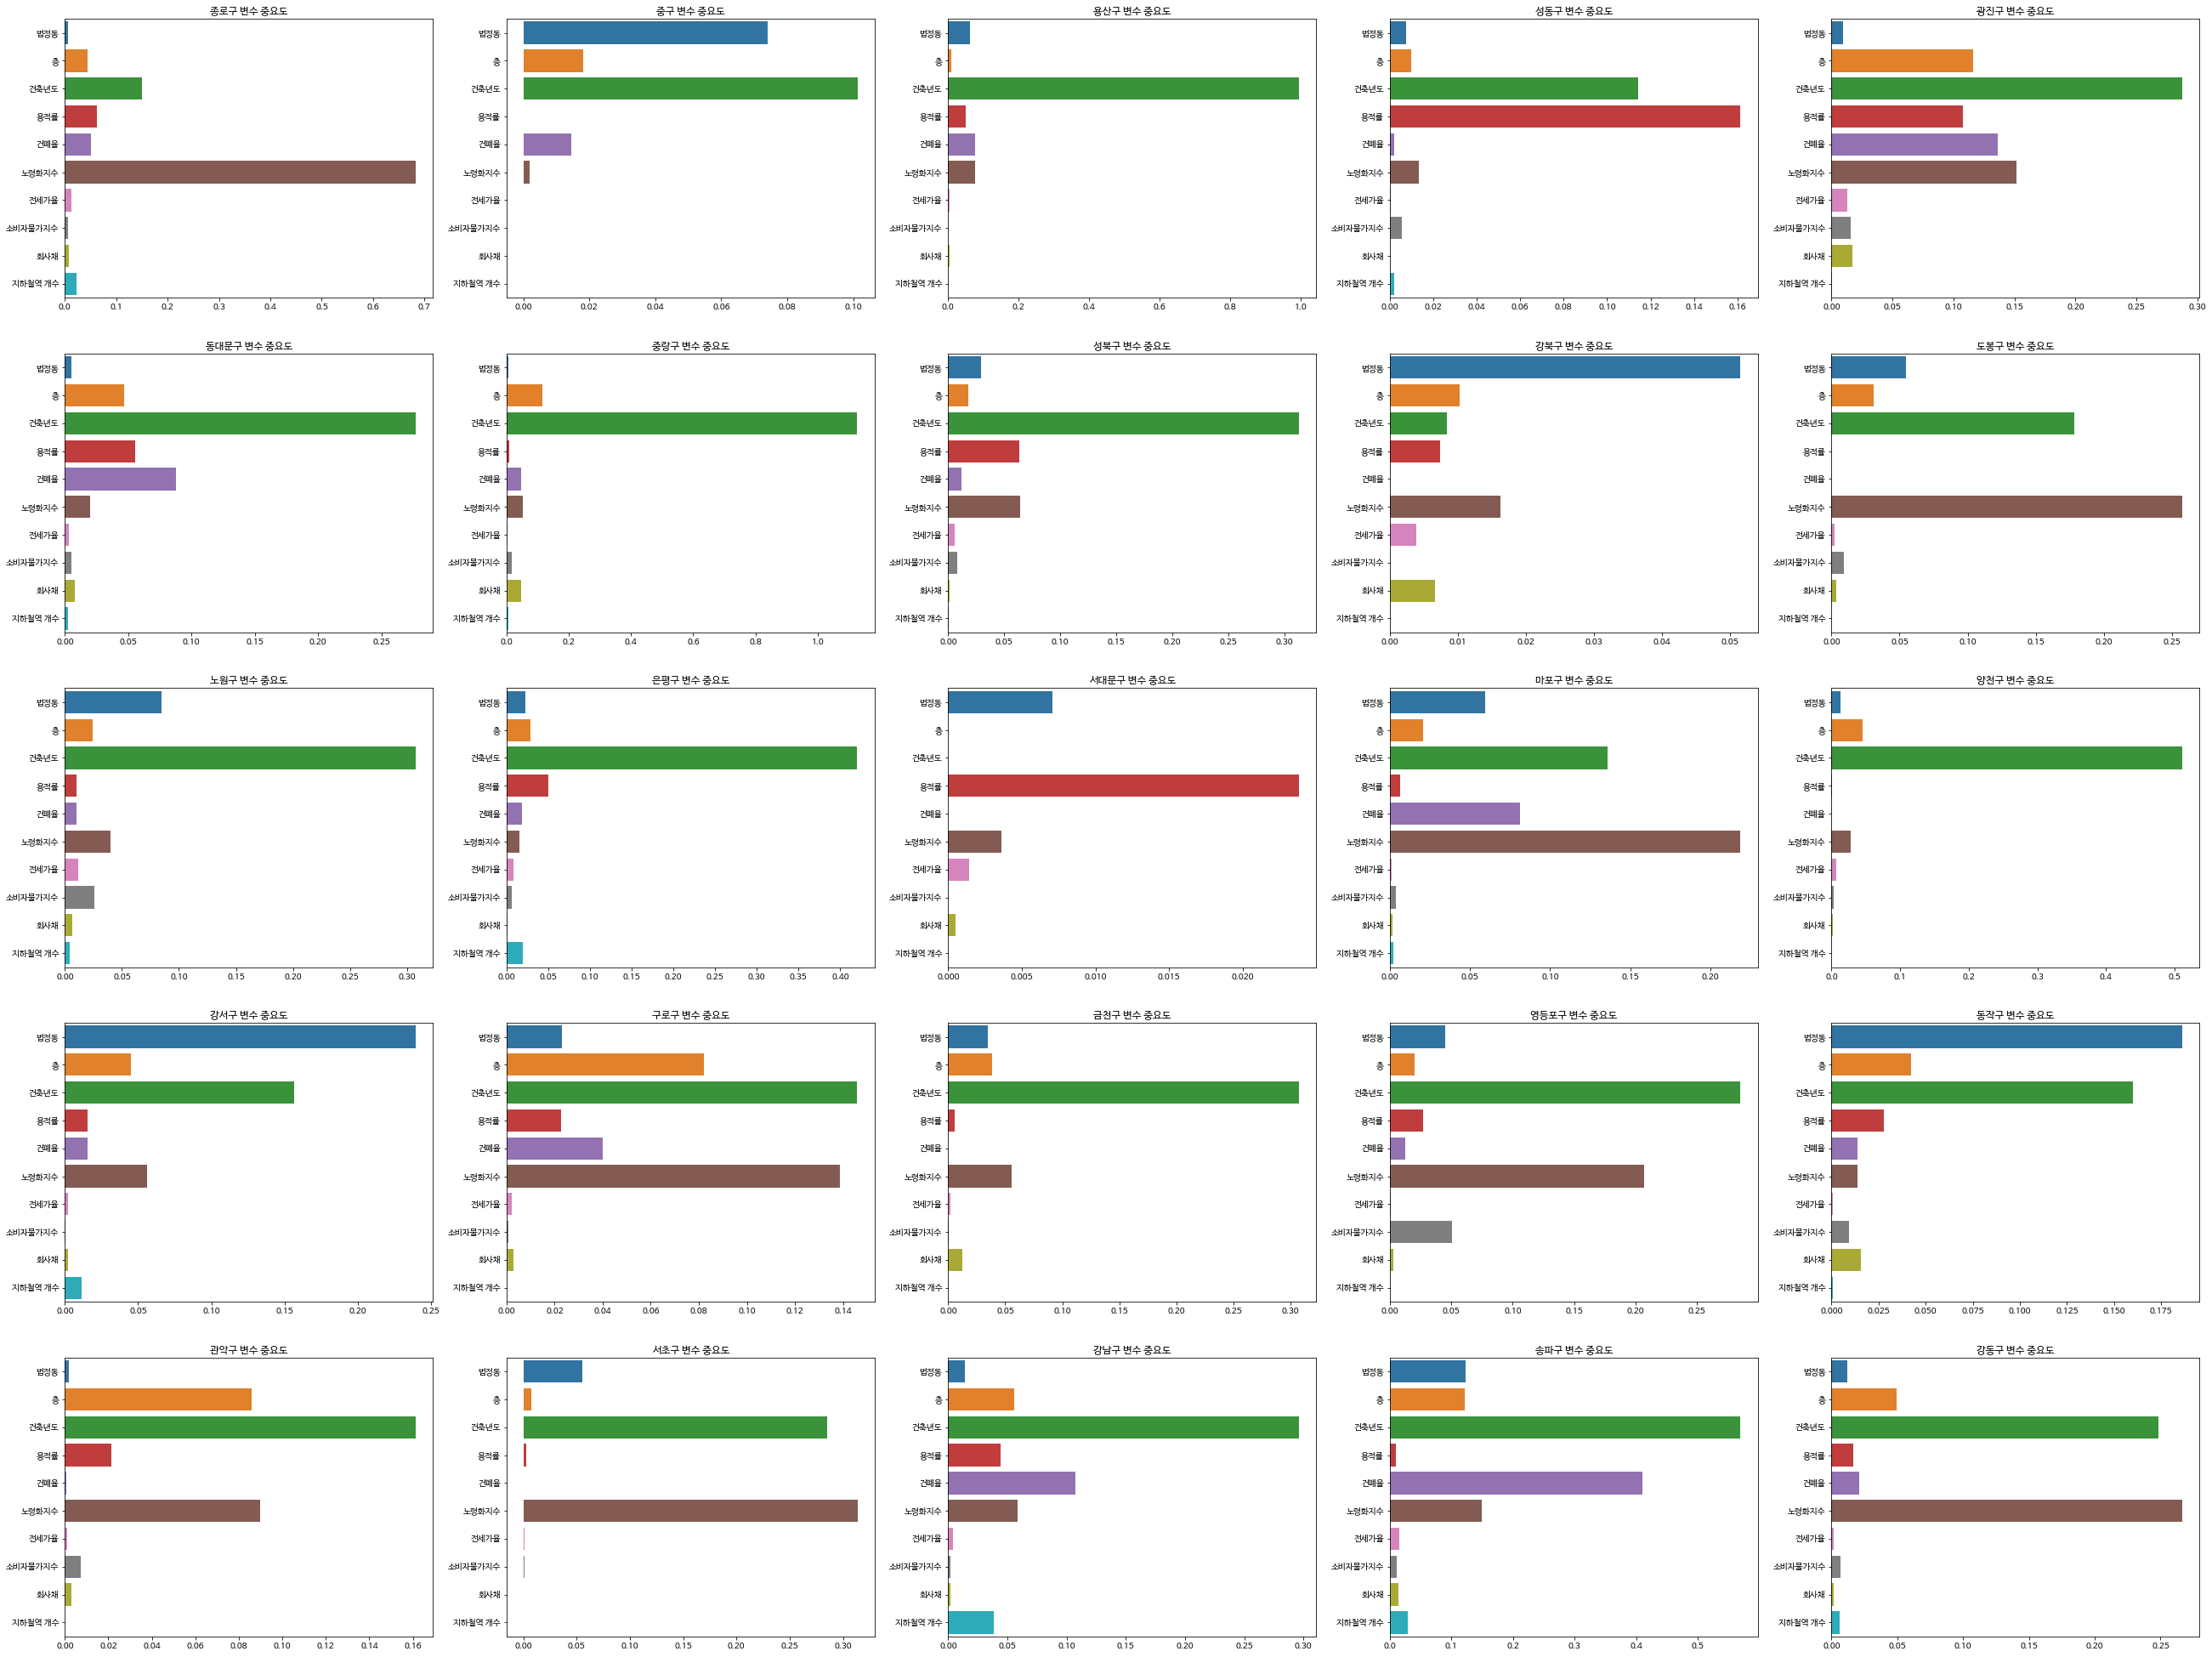

In [15]:
fig, axes = plt.subplots(5, 5, figsize=(45,35))

sns.barplot(x = Jongno_result.importances_mean, y = Jongno_x.columns, ax=axes[0][0]).set(title='종로구 변수 중요도')
sns.barplot(x = Jung_result.importances_mean, y = Jung_x.columns, ax=axes[0][1]).set(title='중구 변수 중요도')
sns.barplot(x = Yongsan_result.importances_mean, y = Yongsan_x.columns, ax=axes[0][2]).set(title='용산구 변수 중요도')
sns.barplot(x = Seongdong_result.importances_mean, y = Seongdong_x.columns, ax=axes[0][3]).set(title='성동구 변수 중요도')
sns.barplot(x = Gwangjin_result.importances_mean, y = Gwangjin_x.columns, ax=axes[0][4]).set(title='광진구 변수 중요도')

sns.barplot(x = Dongdaemun_result.importances_mean, y = Dongdaemun_x.columns, ax=axes[1][0]).set(title='동대문구 변수 중요도')
sns.barplot(x = Jungnang_result.importances_mean, y = Jungnang_x.columns, ax=axes[1][1]).set(title='중랑구 변수 중요도')
sns.barplot(x = Seongbuk_result.importances_mean, y = Seongbuk_x.columns, ax=axes[1][2]).set(title='성북구 변수 중요도')
sns.barplot(x = Gangbuk_result.importances_mean, y = Gangbuk_x.columns, ax=axes[1][3]).set(title='강북구 변수 중요도')
sns.barplot(x = Dobong_result.importances_mean, y = Dobong_x.columns, ax=axes[1][4]).set(title='도봉구 변수 중요도')

sns.barplot(x = Nowon_result.importances_mean, y = Nowon_x.columns, ax=axes[2][0]).set(title='노원구 변수 중요도')
sns.barplot(x = Eunpyeong_result.importances_mean, y = Eunpyeong_x.columns, ax=axes[2][1]).set(title='은평구 변수 중요도')
sns.barplot(x = Seodaemun_result.importances_mean, y = Seodaemun_x.columns, ax=axes[2][2]).set(title='서대문구 변수 중요도')
sns.barplot(x = Mapo_result.importances_mean, y = Mapo_x.columns, ax=axes[2][3]).set(title='마포구 변수 중요도')
sns.barplot(x = Yangcheon_result.importances_mean, y = Yangcheon_x.columns, ax=axes[2][4]).set(title='양천구 변수 중요도')

sns.barplot(x = Gangseo_result.importances_mean, y = Gangseo_x.columns, ax=axes[3][0]).set(title='강서구 변수 중요도')
sns.barplot(x = Guro_result.importances_mean, y = Guro_x.columns, ax=axes[3][1]).set(title='구로구 변수 중요도')
sns.barplot(x = Geumcheon_result.importances_mean, y = Geumcheon_x.columns, ax=axes[3][2]).set(title='금천구 변수 중요도')
sns.barplot(x = Yeongdeungpo_result.importances_mean, y = Yeongdeungpo_x.columns, ax=axes[3][3]).set(title='영등포구 변수 중요도')
sns.barplot(x = Dongjak_result.importances_mean, y = Dongjak_x.columns, ax=axes[3][4]).set(title='동작구 변수 중요도')

sns.barplot(x = Gwanak_result.importances_mean, y = Gwanak_x.columns, ax=axes[4][0]).set(title='관악구 변수 중요도')
sns.barplot(x = Seocho_result.importances_mean, y = Seocho_x.columns, ax=axes[4][1]).set(title='서초구 변수 중요도')
sns.barplot(x = Gangnam_result.importances_mean, y = Gangnam_x.columns, ax=axes[4][2]).set(title='강남구 변수 중요도')
sns.barplot(x = Songpa_result.importances_mean, y = Songpa_x.columns, ax=axes[4][3]).set(title='송파구 변수 중요도')
sns.barplot(x = Gangdong_result.importances_mean, y = Gangdong_x.columns, ax=axes[4][4]).set(title='강동구 변수 중요도')

plt.show()

[Text(0.5, 1.0, '서대문구 변수 중요도')]

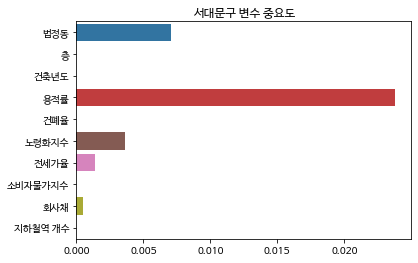

In [19]:
## 세부적으로 보고 싶을 경우 주석 제거하여 직접 확인

#sns.barplot(x = Jongno_result.importances_mean, y = Jongno_x.columns).set(title='종로구 변수 중요도')
#sns.barplot(x = Jung_result.importances_mean, y = Jung_x.columns).set(title='중구 변수 중요도')
#sns.barplot(x = Yongsan_result.importances_mean, y = Yongsan_x.columns).set(title='용산구 변수 중요도')
#sns.barplot(x = Seongdong_result.importances_mean, y = Seongdong_x.columns).set(title='성동구 변수 중요도')
#sns.barplot(x = Gwangjin_result.importances_mean, y = Gwangjin_x.columns).set(title='광진구 변수 중요도')
#sns.barplot(x = Dongdaemun_result.importances_mean, y = Dongdaemun_x.columns).set(title='동대문구 변수 중요도')
#sns.barplot(x = Jungnang_result.importances_mean, y = Jungnang_x.columns).set(title='중랑구 변수 중요도')
#sns.barplot(x = Seongbuk_result.importances_mean, y = Seongbuk_x.columns).set(title='성북구 변수 중요도')
#sns.barplot(x = Gangbuk_result.importances_mean, y = Gangbuk_x.columns).set(title='강북구 변수 중요도')
#sns.barplot(x = Dobong_result.importances_mean, y = Dobong_x.columns).set(title='도봉구 변수 중요도')
#sns.barplot(x = Nowon_result.importances_mean, y = Nowon_x.columns).set(title='노원구 변수 중요도')
#sns.barplot(x = Eunpyeong_result.importances_mean, y = Eunpyeong_x.columns).set(title='은평구 변수 중요도')
sns.barplot(x = Seodaemun_result.importances_mean, y = Seodaemun_x.columns).set(title='서대문구 변수 중요도')
#sns.barplot(x = Mapo_result.importances_mean, y = Mapo_x.columns).set(title='마포구 변수 중요도')
#sns.barplot(x = Yangcheon_result.importances_mean, y = Yangcheon_x.columns).set(title='양천구 변수 중요도')
#sns.barplot(x = Gangseo_result.importances_mean, y = Gangseo_x.columns).set(title='강서구 변수 중요도')
#sns.barplot(x = Guro_result.importances_mean, y = Guro_x.columns).set(title='구로구 변수 중요도')
#sns.barplot(x = Geumcheon_result.importances_mean, y = Geumcheon_x.columns).set(title='금천구 변수 중요도')
#sns.barplot(x = Yeongdeungpo_result.importances_mean, y = Yeongdeungpo_x.columns).set(title='영등포구 변수 중요도')
#sns.barplot(x = Dongjak_result.importances_mean, y = Dongjak_x.columns).set(title='동작구 변수 중요도')
#sns.barplot(x = Gwanak_result.importances_mean, y = Gwanak_x.columns).set(title='관악구 변수 중요도')
#sns.barplot(x = Seocho_result.importances_mean, y = Seocho_x.columns).set(title='서초구 변수 중요도')
#sns.barplot(x = Gangnam_result.importances_mean, y = Gangnam_x.columns).set(title='강남구 변수 중요도')
#sns.barplot(x = Songpa_result.importances_mean, y = Songpa_x.columns).set(title='송파구 변수 중요도')
#sns.barplot(x = Gangdong_result.importances_mean, y = Gangdong_x.columns).set(title='강동구 변수 중요도')